In [1]:
##Libraries to run the tools##
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
import sys
##%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
sns.set(style='white')
from pylab import *

In [3]:
df = pd.read_csv("ligg-vs-resid-11-equil-pore1-4ang.dat", delim_whitespace=True, names= ['serial', 'frames','residues'])

In [4]:
df

,serial,frames,residues
0,5,0,37
1,6,0,37
2,7,0,37
3,10,0,37
4,13,0,63
...,...,...,...
66723,43,2020,39
66724,44,2020,38
66725,45,2020,39
66726,58,2020,35


In [5]:
result = pd.pivot_table(df,
                        values = 'frames', index = ['serial'], columns = ['residues'],
                        fill_value = 0, aggfunc='count')

In [6]:
type(result)

pandas.core.frame.DataFrame

In [7]:
result

residues,30,34,35,37,38,39,40,42,44,46,53,55,56,61,63,65,66,69
serial,,,,,,,,,,,,,,,,,,
1,0,0,0,1427,0,0,0,0,2,0,0,71,1,14,0,0,0,0
2,0,0,0,609,0,0,0,0,0,0,0,56,0,10,0,0,0,0
3,0,0,0,223,0,0,0,0,0,0,0,34,0,9,0,0,0,0
4,0,0,0,823,0,0,0,0,0,0,0,17,0,2,0,0,0,0
5,0,0,0,878,0,3,2,0,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,26,1017,0,0,0,0,0,0,0,0,0,0,0,0,13,293,412
59,0,0,1363,0,0,0,0,0,0,0,0,0,0,0,0,31,44,127
60,2,14,286,0,0,0,0,0,0,1,0,0,0,0,0,195,200,572


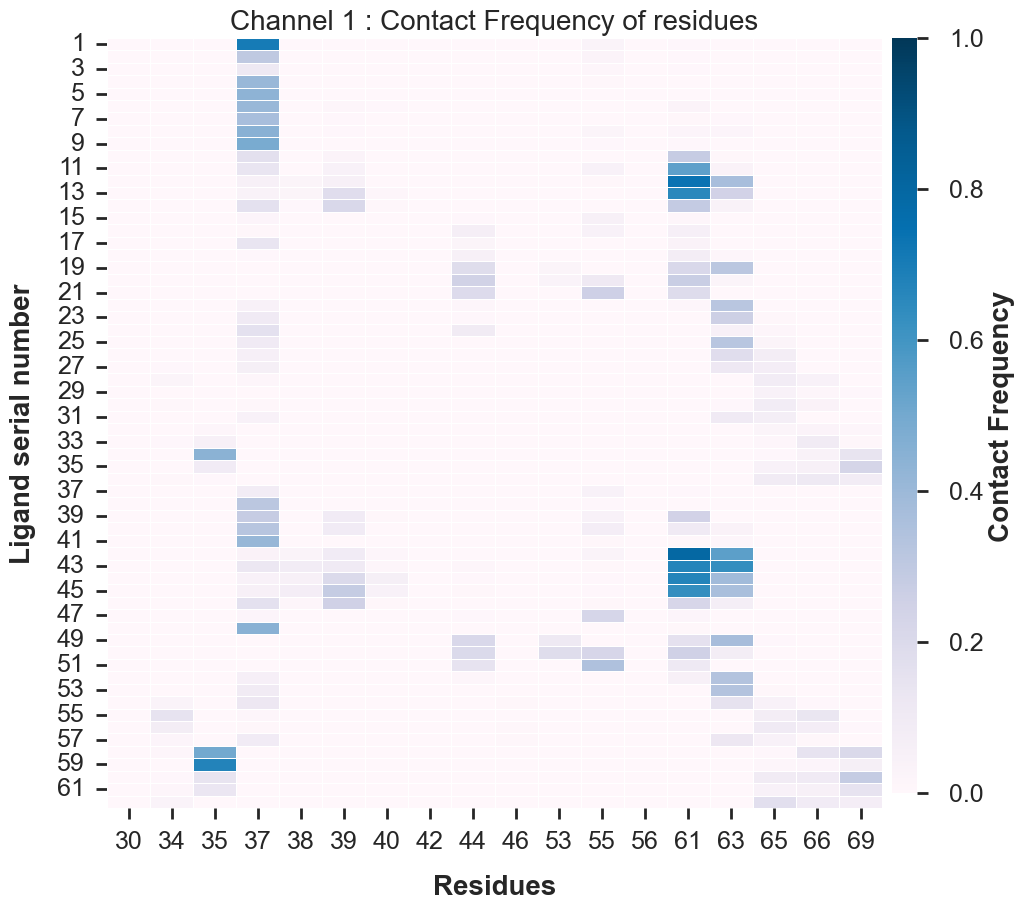

In [8]:
sns.set_style(style='ticks', rc=None)
from pylab import*
rc('axes', linewidth=3.5)
fig,ax=plt.subplots(1,1,figsize=(10,10), num=123456)
cbax=fig.add_axes([0.91,0.125,0.025,0.755])
fig.subplots_adjust(hspace=0.030, wspace=0)
###heatmap plot of Lig and sidechain with frames(times)###
res=sns.heatmap(result/(number of frames used for calculation), annot=None, cmap='PuBu', ax=ax, vmin=0, vmax=1, cbar_ax=cbax, linewidths=0.6, linecolor='w', alpha=1)
###make frame visible###
#for _, spine in res.spines.items():
#    spine.set_visible(True)
    
ax.set_xlabel('Residues', weight='bold', fontsize=20, labelpad=15, fontname='arial')  
ax.set_ylabel('Ligand serial number', weight='bold', fontsize=20, labelpad=15, fontname='arial')
ax.set_title('Channel 1 : Contact Frequency of residues', fontsize=20, fontname='arial')
cbax.set_ylabel('Contact Frequency', weight='bold', fontsize=20, fontname='arial')
cbax.tick_params(labelsize=18, which='major', pad=15, length=8, width=2, direction='out')
ax.tick_params(axis='x', which='major', pad=8, labelsize=18, length=8, width=2.0, direction='out')
ax.tick_params(axis='y', which='major', pad=8, labelsize=18, length=8, width=2.0, direction='out', rotation=0)
#plt.ylim(63,124,2)
#plt.xlim(0,500,20)
#ax.tick_params(axis='both', which='major', pad=15, labelsize=25, length=15, buttom='bool', width=2.5, direction='out')
###save the figure###
fig.savefig('contact-frequency-pore1-lig-vs-residues-test.png', bbox_inches='tight', dpi=500)

In [ ]:
##write the matrix in one excel sheet##
result.to_excel("myname.xlsx")